# EXPLORATORY DATA ANALYSIS ON HABERMAN DATASET

#  Loading the dataset

In [9]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [10]:
haberman = pd.read_csv("haberman.csv")

In [12]:
labels = [ 'age' , 'operation_year' , 'axil_nodes' , 'survive status']

Adding labels to dataset

In [13]:
haberman = pd.read_csv("haberman.csv" , names = labels)

In [14]:
haberman.head()


,age,operation_year,axil_nodes,survive status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [16]:
#Print data points and features

print (haberman.shape)

(306, 4)


In [17]:
#column names

print(haberman.columns)

Index(['age', 'operation_year', 'axil_nodes', 'survive status'], dtype='object')


In [18]:
#How many data points

haberman["survive status"].value_counts()

1    225
2     81
Name: survive status, dtype: int64

# SCATTER PLOT

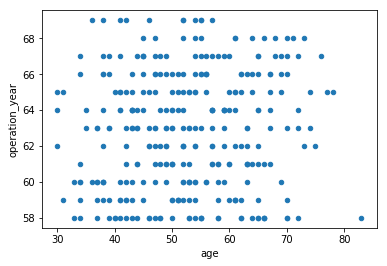

In [19]:
haberman.plot(kind = "scatter" , x= 'age' , y = 'operation_year')
plt.show()

The scatterplot seems very mixed and we cannot deduce anything from it.

# PAIR PLOTS

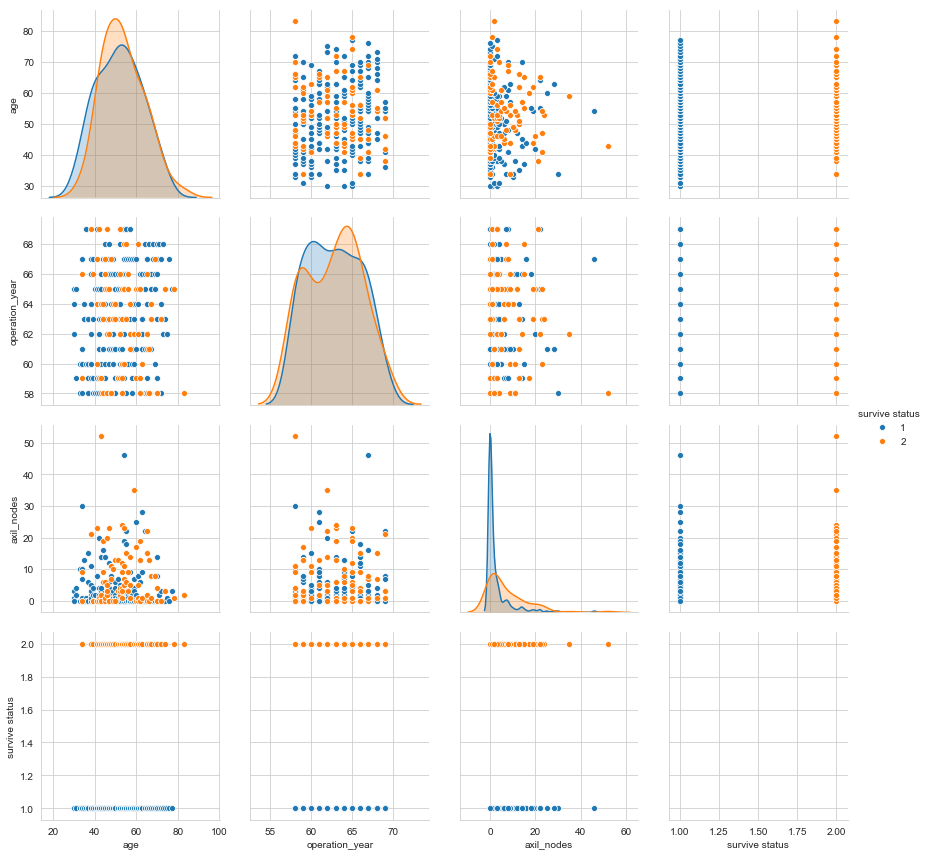

In [20]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot (haberman , hue = "survive status" , size =3)
plt.show()

Observations:

1. Age and operation year has effect on survival status
2. Axil node has effect on survival status.
3. There is also too much overlapping to understand the features.

# UNIVARIATE ANALYSIS USING PDF

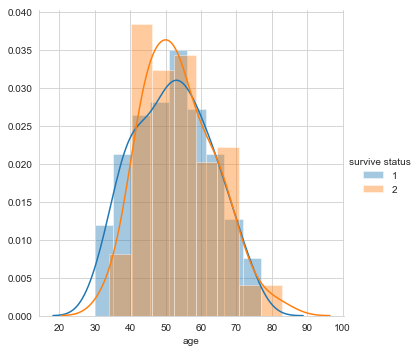

In [21]:
sns.FacetGrid( haberman, hue= "survive status" , size = 5) \
   .map (sns.distplot , "age") \
   .add_legend();
plt.show()

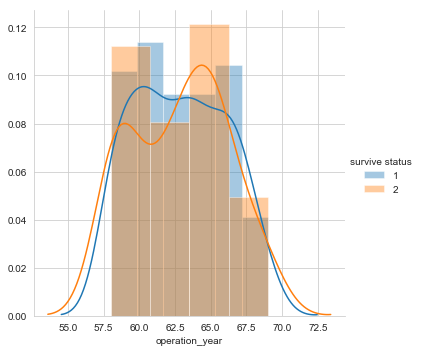

In [22]:
sns.FacetGrid( haberman, hue= "survive status" , size = 5) \
   .map (sns.distplot , "operation_year") \
   .add_legend();
plt.show()

Observations:

1. There is too much overlapping and it seems year of operations is not a useful feauture to determine status of patients.

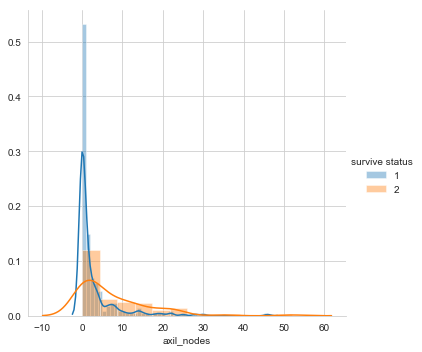

In [23]:
sns.FacetGrid( haberman, hue= "survive status" , size = 5) \
   .map (sns.distplot , "axil_nodes") \
   .add_legend();
plt.show()

Observations:

1. The PDF of all axil nodes for patients who survived more than 5 years is less than 0.

CDF PLOT

[0.64379085 0.12745098 0.04575163 0.05228758 0.01960784 0.03921569
 0.00980392 0.01633987 0.02287582 0.00653595 0.00326797 0.00326797
 0.         0.00326797 0.         0.         0.         0.00326797
 0.         0.00326797]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


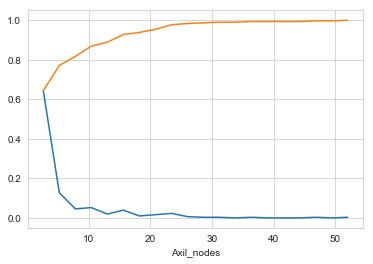

In [24]:
counts, bin_edges = np.histogram(haberman['axil_nodes'], bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Axil_nodes')
plt.show()

Observations:

1. Orange line determines the cdf of patients who survived for more than 5 years.

2. Blue line determine the pdf of pattients who survived for more than 5 years.

3. The patients above 46 axil nodes can be considered dead within 5 years.

4. People having less number of lymph node survived.

# BOXPLOT

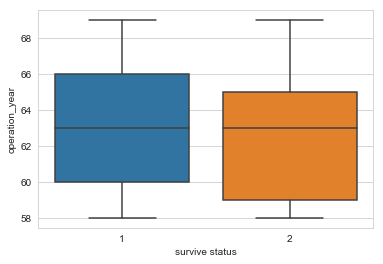

In [25]:
sns.boxplot( x = 'survive status' , y ='operation_year', data = haberman)
plt.show()

# VIOLIN PLOT

It is combination of boxplot and PDF

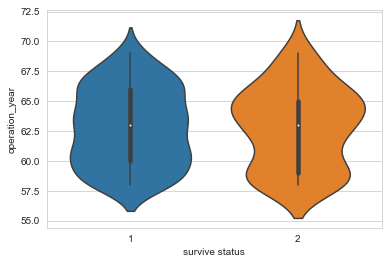

In [26]:
sns.violinplot ( x = "survive status" , y = "operation_year", data =haberman , size = 8)
plt.show()

# CONCLUSION

1. From BoxPlot and Violin Plot it is determined that number of patients have died between 46-62 and between 59-65. The patients who have survived have gae between 60-66.


# FINAL CONCLUSION

1. Axil node is a major feauture to determine survival statud of patients.
2. The pair and scatter plots does not help in the distinguishing between the survial staus of patients.
3. People having less number of lymph nodes have survived for more than 5 years.